<a href="https://colab.research.google.com/github/sairithwikredddy/EX_AI_LAB-_ASS/blob/main/EXP_AI_ASS_1_(2497).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1
---



In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression


data = pd.DataFrame({
    'Challenges_Launched': [1, 2, 3, 1, 2],
    'Active_Users': [120, 160, 200, 130, 170]
})

X = data[['Challenges_Launched']]
y = data['Active_Users']

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_
print(f"Linear Regression Equation: y = {slope:.2f}x + {intercept:.2f}")

baseline = np.mean(y)
print(f"Baseline (mean of Active Users): {baseline:.2f}")

data['Predicted'] = model.predict(X)
data['SHAP_Value'] = data['Predicted'] - baseline
data['Baseline_plus_SHAP'] = baseline + data['SHAP_Value']

def prediction_status(actual, predicted):
    if predicted > actual:
        return "Over Prediction"
    elif predicted < actual:
        return "Under Prediction"
    else:
        return "Exact Match"

data['Prediction_Status'] = data.apply(lambda row:
    prediction_status(row['Active_Users'], row['Predicted']), axis=1)

print("\nDetailed Table:")
print(data)

mse = np.mean((data['Predicted'] - y) ** 2)
r_squared = model.score(X, y)


print("\nSummary Analysis:")
print(f"Model Performance (R-squared): {r_squared:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Strength of Influence from 'Challenges Launched': The coefficient ({slope:.2f}) indicates that for each additional challenge launched, the predicted active users increase by approximately {slope:.2f}.")

linearity_assessment = "The relationship appears to be reasonably linear based on the R-squared value." if r_squared > 0.7 else "The linearity of the relationship is weak based on the R-squared value."
print(f"Relationship Linearity: {linearity_assessment}")

print("SHAP-based Feature Attribution Clarity: SHAP values clearly show the contribution of 'Challenges Launched' to the difference between the prediction and the baseline.")

Linear Regression Equation: y = 37.86x + 87.86
Baseline (mean of Active Users): 156.00

Detailed Table:
   Challenges_Launched  Active_Users   Predicted  SHAP_Value  \
0                    1           120  125.714286  -30.285714   
1                    2           160  163.571429    7.571429   
2                    3           200  201.428571   45.428571   
3                    1           130  125.714286  -30.285714   
4                    2           170  163.571429    7.571429   

   Baseline_plus_SHAP Prediction_Status  
0          125.714286   Over Prediction  
1          163.571429   Over Prediction  
2          201.428571   Over Prediction  
3          125.714286  Under Prediction  
4          163.571429  Under Prediction  

Summary Analysis:
Model Performance (R-squared): 0.97
Mean Squared Error: 21.43
Strength of Influence from 'Challenges Launched': The coefficient (37.86) indicates that for each additional challenge launched, the predicted active users increase by approximat

2

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

data = pd.DataFrame({
    'Emails_Sent': [100, 80, 120, 90, 70],
    'Topic_Score': [8, 6, 9, 5, 4],
    'Attendance': [200, 160, 230, 150, 130]
})

X = data[['Emails_Sent', 'Topic_Score']]
y = data['Attendance']

model = LinearRegression()
model.fit(X, y)

coeffs = model.coef_
intercept = model.intercept_
print(f"Linear Regression Equation: y = {coeffs[0]:.2f}*Emails + {coeffs[1]:.2f}*Topic + {intercept:.2f}")

baseline = np.mean(y)
print(f"Baseline (mean of Attendance): {baseline:.2f}")

data['Predicted'] = model.predict(X)
mean_emails = np.mean(data['Emails_Sent'])
mean_topic = np.mean(data['Topic_Score'])

# Calculate SHAP values for each feature based on difference from mean and coefficients
data['SHAP_Emails'] = (data['Emails_Sent'] - mean_emails) * coeffs[0]
data['SHAP_Topic'] = (data['Topic_Score'] - mean_topic) * coeffs[1]

# Validate SHAP decomposition: Prediction = Baseline + SHAP(Emails) + SHAP(Topic Score)
data['Baseline_plus_SHAP'] = baseline + data['SHAP_Emails'] + data['SHAP_Topic']

def prediction_status(actual, predicted):
    if predicted > actual:
        return "Over Prediction"
    elif predicted < actual:
        return "Under Prediction"
    else:
        return "Exact Match"

data['Prediction_Status'] = data.apply(lambda row:
    prediction_status(row['Attendance'], row['Predicted']), axis=1)

print("\nDetailed Table:")
print(data)

mse = np.mean((data['Predicted'] - y) ** 2)
accuracy = 100 - (np.mean(abs(data['Predicted'] - y) / y) * 100)

print("\nSummary Analysis:")
print(f"Model Accuracy (Approx): {accuracy:.2f}%")
print(f"Mean Squared Error: {mse:.2f}")
print("Trend: As emails and topic score increase, predicted attendance also increases.")
print("SHAP Interpretation: SHAP values show how much each feature contributed to changing predictions from the baseline.")

Linear Regression Equation: y = 0.59*Emails + 14.30*Topic + 28.26
Baseline (mean of Attendance): 174.00

Detailed Table:
   Emails_Sent  Topic_Score  Attendance   Predicted  SHAP_Emails  SHAP_Topic  \
0          100            8         200  201.594203     4.714976   22.879227   
1           80            6         160  161.207729    -7.072464   -5.719807   
2          120            9         230  227.681159    16.502415   37.178744   
3           90            5         150  152.801932    -1.178744  -20.019324   
4           70            4         130  126.714976   -12.966184  -34.318841   

   Baseline_plus_SHAP Prediction_Status  
0          201.594203   Over Prediction  
1          161.207729   Over Prediction  
2          227.681159  Under Prediction  
3          152.801932   Over Prediction  
4          126.714976  Under Prediction  

Summary Analysis:
Model Accuracy (Approx): 98.61%
Mean Squared Error: 5.60
Trend: As emails and topic score increase, predicted attendance also i

3

Baseline: 0.3469055374592834
     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.029625 -0.143993       0.026506       0.006795 -0.026482  0.040364   
1      -0.012248 -0.065124      -0.012272       0.006263  0.026365  0.065929   
2      -0.012248 -0.087658       0.012819      -0.010764  0.026365 -0.007760   
3       0.050561 -0.093291      -0.023677      -0.010764  0.026365 -0.101000   
4       0.040093  0.070081      -0.046487      -0.010764  0.026365 -0.021295   
..           ...       ...            ...            ...       ...       ...   
149     0.061029  0.233453      -0.041925      -0.010764  0.026365 -0.013775   
150    -0.022716 -0.262297       0.031068       0.005199  0.010789  0.029837   
151     0.050561 -0.160894      -0.005429      -0.010764  0.026365  0.082472   
152    -0.012248  0.126416      -0.000867       0.009455 -0.073767 -0.049868   
153     0.050561 -0.279198      -0.000867       0.010519  0.012736  0.059914   

     Diabe

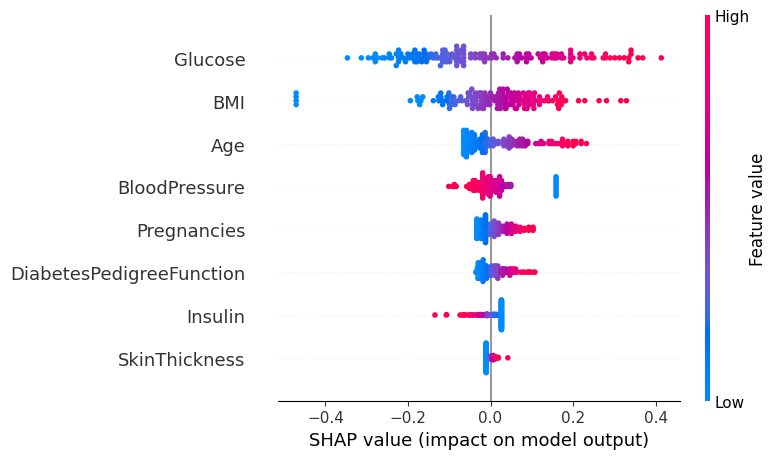

In [ ]:
import pandas as pd
import shap
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data = pd.read_csv("/content/diabetes.csv")
X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

baseline = np.mean(y_train)

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

predictions = model.predict(X_test)
shap_df = pd.DataFrame(shap_values.values, columns=X.columns)
shap_df['Baseline'] = baseline
shap_df['Predicted'] = predictions
shap_df['Actual'] = y_test.values
shap_df['Sum_SHAP'] = shap_df[X.columns].sum(axis=1) + baseline
shap_df['Prediction_Status'] = np.where(shap_df['Predicted'] > shap_df['Actual'], "Over",np.where(shap_df['Predicted'] < shap_df['Actual'], "Under", "Exact"))

print("Baseline:", baseline)
print(shap_df)

shap.summary_plot(shap_values, X_test)


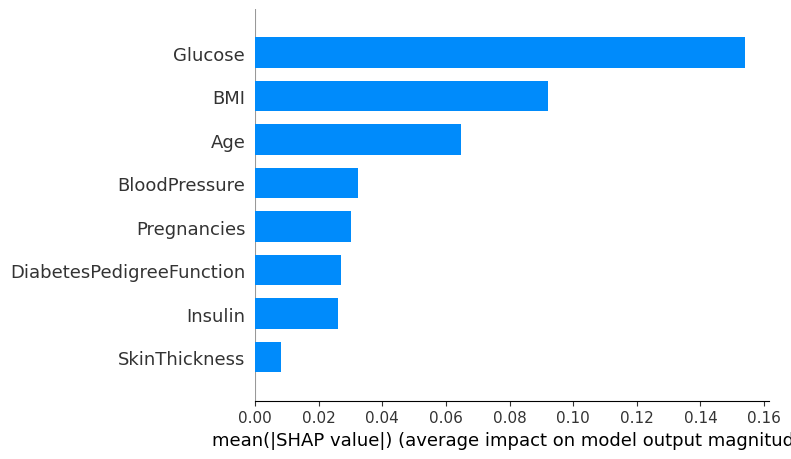

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

4

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')


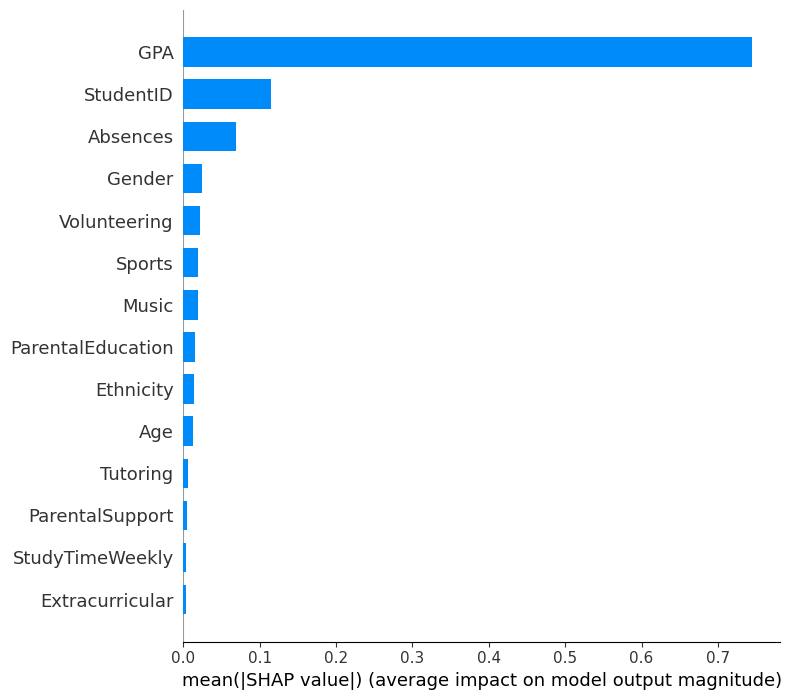

      StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
1004       2005   15       1          2                  4         0.135763   
196        1197   16       1          0                  4         1.989925   
2342       3343   15       0          0                  0        10.588715   
1708       2709   18       1          1                  2        16.208658   
435        1436   18       0          0                  0         3.576821   
...         ...  ...     ...        ...                ...              ...   
986        1987   18       1          0                  2         8.412605   
120        1121   18       1          0                  3         3.170405   
283        1284   17       0          0                  1         5.141922   
1740       2741   18       1          1                  0        10.281614   
1726       2727   18       1          0                  0        15.610436   

      Absences  Tutoring  ParentalSupport  Extracur

In [ ]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = pd.read_csv('/content/Student_performance_data _.csv')
print(data.columns)
X = data.drop('GradeClass', axis=1)
y = data['GradeClass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

baseline = np.mean(y_train)
predictions = model.predict(X_test)
mean_vals = X_train.mean()
shap_values_manual = (X_test - mean_vals) * model.coef_
shap_sum = shap_values_manual.sum(axis=1) + baseline

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.show()
results = X_test.copy()
results['Actual'] = y_test.values
results['Predicted'] = predictions
results['Baseline'] = baseline
for col in X_test.columns:
    results[f"SHAP_{col}"] = shap_values_manual[col]
results['SHAP_Sum'] = shap_values_manual.sum(axis=1)
results['Baseline_plus_SHAP'] = shap_sum
results['Prediction_Status'] = np.where(results['Predicted'] > results['Actual'], 'Over Prediction',
                                        np.where(results['Predicted'] < results['Actual'], 'Under Prediction', 'Exact Match'))

print(results)

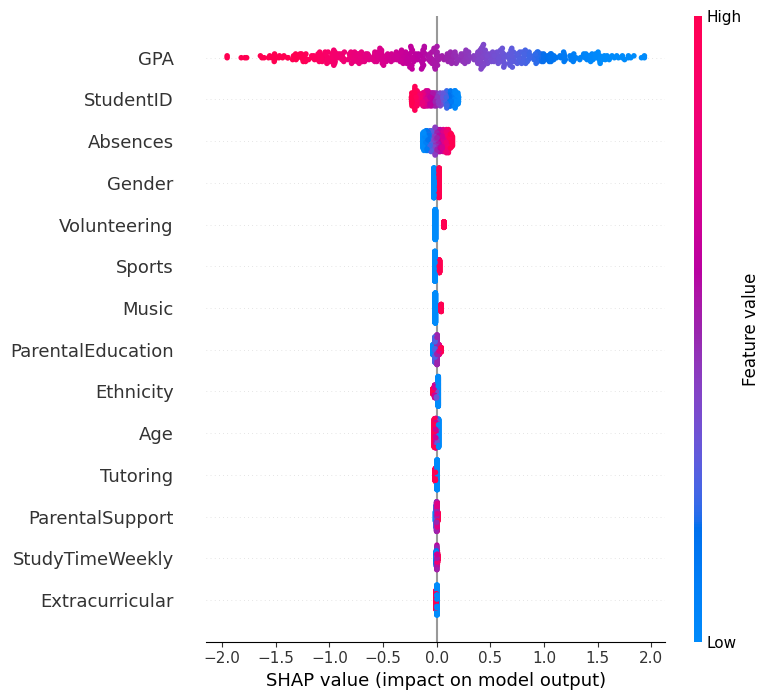

In [ ]:
shap.summary_plot(shap_values, X_test)
plt.show()